## Install dependencies

In [597]:
%pip install matplotlib
%pip install pandas
%pip install openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Read Data

In [598]:

import pandas as pd
import matplotlib as plt
from datetime import datetime
import matplotlib.pyplot as plt

results = pd.read_csv("results.csv")

In [599]:

would_like_features = pd.DataFrame({
    "id": [0,1,2,3,4],
    "value": [
        "Reporte de incidentes con fotos",
        "Ubicación del incidente",
        "Notificaciones de seguimiento",
        "Contacto con autoridades",
        "Foro comunitario"
        ]
})


waste_problems = pd.DataFrame({
    "id": [0,1,2,3],
    "value": [
        "Acumulación de basura",
        "Falta de recolección",
        "Quema de basura",
        "Contenedores insuficientes"
    ]
})

security_problems = pd.DataFrame({
    "id": [0,1,2,3,4],
    "value": [
        "Robos",
        "Vandandalismo",
        "Consumo de drogas",
        "Violencia",
        "Otros___"
    ]
})

are_authorities_efective = pd.DataFrame({
    "id": [-2,-1,0,1,2],
    "value": [
        "Nada efectiva",
        "Poca efectiva",     
        "Nunca e probado",
        "Algo efectiva",    
        "Muy efectiva"
    ]
})

ambiguous_question = pd.DataFrame({
    "id": [-1,0,1],
    "value": [
        "No",
        "Tal vez",
        "Sí"
    ]
})

frequency = pd.DataFrame({
    "id":[-2, -1, 0, 1, 2],
    "value": ['Rara vez', 'A veces', 'Nunca', 'Frecuentemente', 'Siempre']
})

total_entries = results.shape[0]

closed_questions_labels = {False: "No", True: "Si"}
gender_labels = {0: "Femenino", 1: "Masculino"}
ambiguous_questions_labels = dict(zip(ambiguous_question["id"], ambiguous_question["value"]))
would_like_features_labels = dict(zip(would_like_features["id"], would_like_features["value"]))
frequency_labels = dict(zip(frequency["id"], frequency["value"]))
waste_problems_labels = dict(zip(waste_problems["id"], waste_problems["value"]))
security_problems_labels = dict(zip(security_problems["id"], security_problems["value"]))


## Helper functions

In [600]:

def string_to_number(number_string: str):
    number_string = number_string.strip()

    try:
        return int(number_string)
    except:
        pass

    return None

closed_question_serializer = lambda ans: ans=="Sí"


def string_list_serializer(ans: str):
    return ans.split(";")


def serialize_would_like_features(ans: str):
    answers = ans.split(";")
    serialized_answers = []
    for answer in answers:
        for row in would_like_features.itertuples():
            if answer.strip() == row.value:
                serialized_answers.append(row.id)

    return serialized_answers

def serialize_are_authorities_efective(ans: str):
    for row in are_authorities_efective.itertuples():
        if ans.strip() == row.value:
            return row.id
    return 0 

def serialize_ambiguous_question(ans: str):
    for row in ambiguous_question.itertuples():
        if ans.strip() == row.value:
            return row.id
    return 0

def serialize_frequency(ans: str):
    for row in frequency.itertuples():
        if ans.strip() == row.value:
            return row.id
        
    return 0

def serialize_waste_problems(ans: str):
    answers = ans.split(";")
    serialized_answers = []
    for answer in answers:
        for row in waste_problems.itertuples():
            if answer.strip() == row.value:
                serialized_answers.append(row.id)

    return serialized_answers
    
def serialize_security_problems(ans: str):
    answers = ans.split(";")
    serialized_answers = []
    for answer in answers:
        for row in security_problems.itertuples():
            if answer.strip() == row.value:
                serialized_answers.append(row.id)

    return serialized_answers
    

## Change column names

In [601]:

new_name_columns = [
    "date",
    "age",
    "gender",
    "has_access_smartphone",
    "would_use_app",
    "uses_social_mobile_apps",
    "years_lived_in_dimitrov",
    "frequency_security_problems",
    "frequency_waste_problems",
    "security_problems",
    "waste_problems",
    "knows_where_report",
    "are_authorities_efective",
    "would_like_features"
]



results.columns = new_name_columns

## Serialize Data

In [602]:
results["date"] = results["date"].apply(lambda ds: datetime.strptime(ds[:-4], "%Y/%m/%d %I:%M:%S %p"))

# there are some ages that does not include only digits so i will omit those
results["age"] = results["age"].apply(string_to_number)
average_age = results["age"].mean()
results["age"] = results["age"].fillna(round(average_age))

results["gender"] = results["gender"].apply(lambda gs: 1 if gs=="Masculinos" else 0)
results["has_access_smartphone"] = results["has_access_smartphone"].apply(closed_question_serializer)
results["would_use_app"] = results["would_use_app"].apply(serialize_ambiguous_question )
results["uses_social_mobile_apps"] = results["uses_social_mobile_apps"].apply(closed_question_serializer)

# drop years_lived_in_dimitrov because the data has too much noise
results.drop("years_lived_in_dimitrov", axis=1, inplace=True)

results["frequency_security_problems"] = results["frequency_security_problems"].apply(serialize_frequency)
results["frequency_waste_problems"] = results["frequency_waste_problems"].apply(serialize_frequency)

results["security_problems"] = results["security_problems"].apply(serialize_security_problems)
results["waste_problems"] = results["waste_problems"].apply(serialize_waste_problems)

results["are_authorities_efective"] = results["are_authorities_efective"].apply(serialize_are_authorities_efective)
results["knows_where_report"] = results["knows_where_report"].apply(closed_question_serializer)

results["would_like_features"] = results["would_like_features"].apply(serialize_would_like_features)


## Generate graphs

In [603]:



get_results_absolute_value = lambda p: f'{int(p * total_entries / 100)}'

def create_plot(name: str):
    plt.savefig("output/graphs/"+ name + ".png", bbox_inches='tight')
    plt.show()
    plt.clf()

def create_closed_question_distribution_pie(df: pd.DataFrame, column: str, title: str):
    distribution_plot = results[column].value_counts().rename(index=closed_questions_labels).plot(kind="pie", autopct=get_results_absolute_value)
    distribution_plot.set_title(title)
    distribution_plot.set_axis_off()

## Analisis

## Evaluar la percepción y aceptación del uso de aplicaciones tecnológicas

### ¿Tiene acceso a un teléfono inteligente (smartphone)?

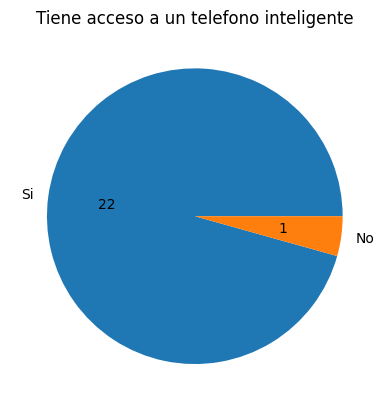

<Figure size 640x480 with 0 Axes>

In [604]:

create_closed_question_distribution_pie(df=results, column="has_access_smartphone",title="Tiene acceso a un telefono inteligente" )
create_plot("tiene_telefono")


### ¿Utiliza aplicaciones móviles de redes sociales o mensajería?

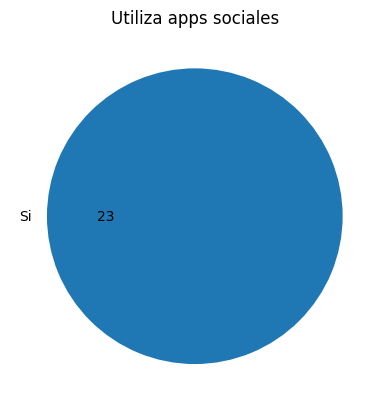

<Figure size 640x480 with 0 Axes>

In [605]:
create_closed_question_distribution_pie(df=results, column="uses_social_mobile_apps", title="Utiliza apps sociales")
create_plot("usa_apps_sociales")


### ¿Estaría dispuesto(a) a usar una aplicación para reportar problemas de seguridad o basura en su barrio? 

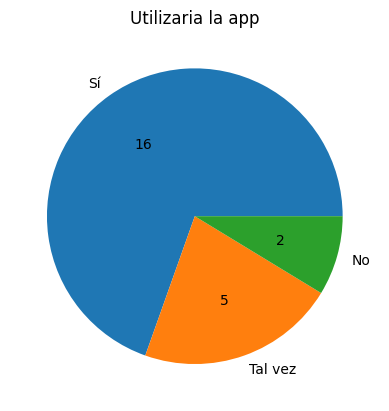

<Figure size 640x480 with 0 Axes>

In [606]:
would_use_app_plot = results["would_use_app"].value_counts().rename(index=ambiguous_questions_labels).plot(kind="pie", autopct=get_results_absolute_value)
would_use_app_plot.set_title("Utilizaria la app")
would_use_app_plot.set_axis_off()
create_plot("usaria_app")

### Correlacion entre si usarian la app y si tienen smartphone

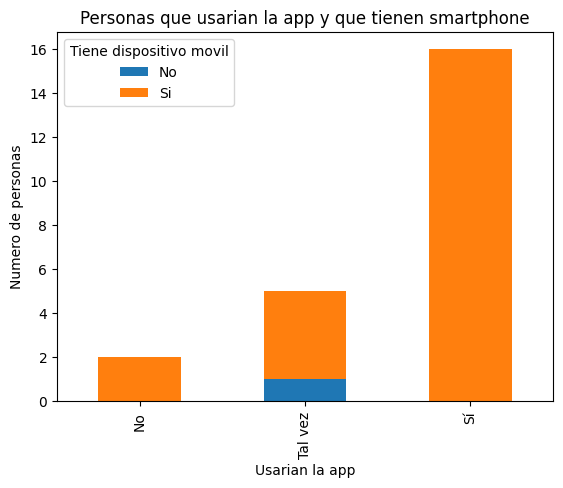

<Figure size 640x480 with 0 Axes>

In [607]:
would_use_app_and_has_smartphone = results.groupby(["would_use_app", "has_access_smartphone"]).size().unstack()
would_use_app_and_has_smartphone_plot = would_use_app_and_has_smartphone.plot(kind="bar", stacked=True)
would_use_app_and_has_smartphone_plot.set_ylabel("Numero de personas")
would_use_app_and_has_smartphone_plot.set_xlabel("Usarian la app")
would_use_app_and_has_smartphone_plot.set_title("Personas que usarian la app y que tienen smartphone")
would_use_app_and_has_smartphone_plot.set_xticklabels(ambiguous_questions_labels.values())
would_use_app_and_has_smartphone_plot.legend(title="Tiene dispositivo movil", labels=closed_questions_labels.values())
create_plot("usaria_app_y_tienen_smartphone")


### Distribucion edad <-> genero

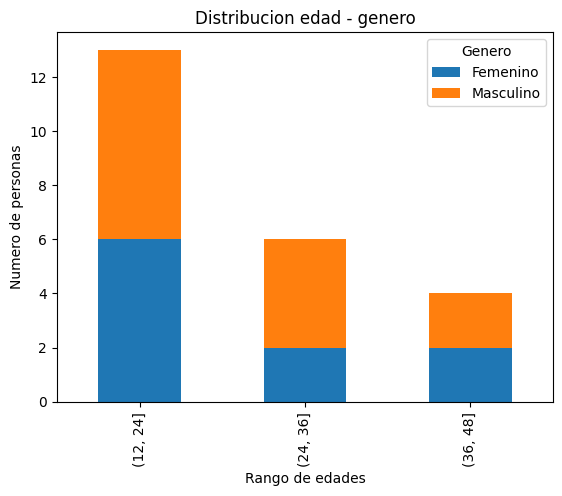

<Figure size 640x480 with 0 Axes>

In [608]:
results["age_range"] = pd.cut(results["age"], [12,24,36,48])
age_gender_plot = results.groupby(["age_range", "gender"], observed=True).size().unstack().plot(kind="bar", stacked=True)
age_gender_plot.set_xlabel("Rango de edades")
age_gender_plot.set_ylabel("Numero de personas")
age_gender_plot.legend(title="Genero", labels=gender_labels.values())
age_gender_plot.set_title("Distribucion edad - genero")
create_plot("distribucion_edad_genero")

### Rangos de edades que utilizarian la app

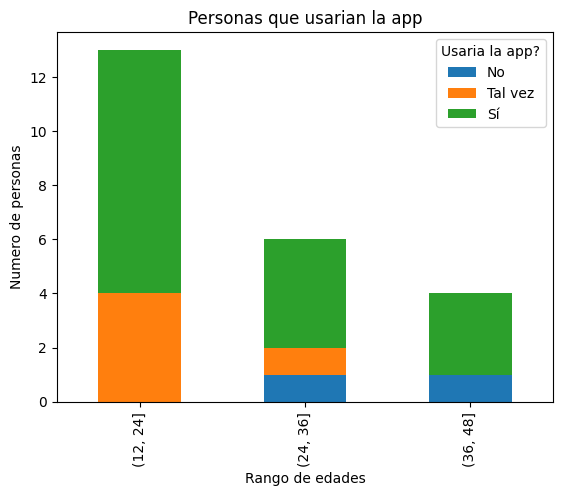

<Figure size 640x480 with 0 Axes>

In [609]:
age_gender_plot = results.groupby(["age_range", "would_use_app"], observed=True).size().unstack().plot(kind="bar", stacked=True)
age_gender_plot.set_xlabel("Rango de edades")
age_gender_plot.set_ylabel("Numero de personas")
age_gender_plot.legend(title="Usaria la app?", labels=ambiguous_questions_labels.values())
age_gender_plot.set_title("Personas que usarian la app")
create_plot("distribucion_usarian_edad")

### Funciones deseadas

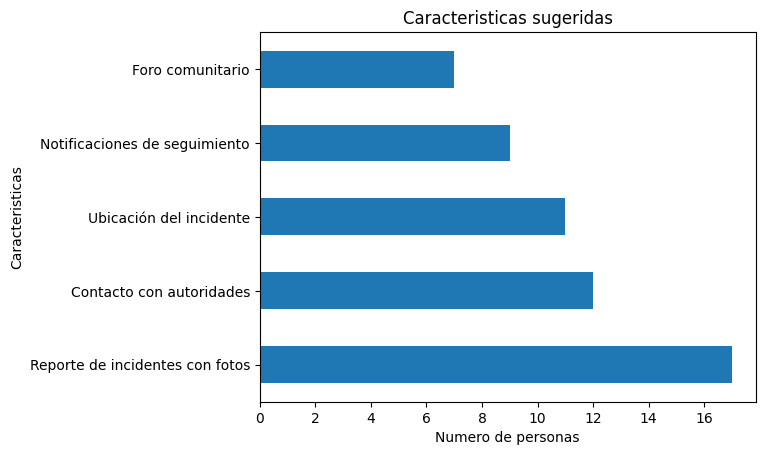

<Figure size 640x480 with 0 Axes>

In [610]:
exploded_would_like_results = results.explode("would_like_features")["would_like_features"].value_counts()
would_like_results_plot = exploded_would_like_results.plot(kind="barh")
would_like_results_plot.set_yticklabels(labels=[would_like_features_labels[int(original_label.get_text())] for original_label in would_like_results_plot.get_yticklabels()])
would_like_results_plot.set_title("Caracteristicas sugeridas")
would_like_results_plot.set_ylabel("Caracteristicas")
would_like_results_plot.set_xlabel("Numero de personas")
create_plot("funciones_deseadas")

## Identificar los problemas de seguridad y gestión de residuos

### ¿Con qué frecuencia enfrenta problemas de seguridad en su barrio? 

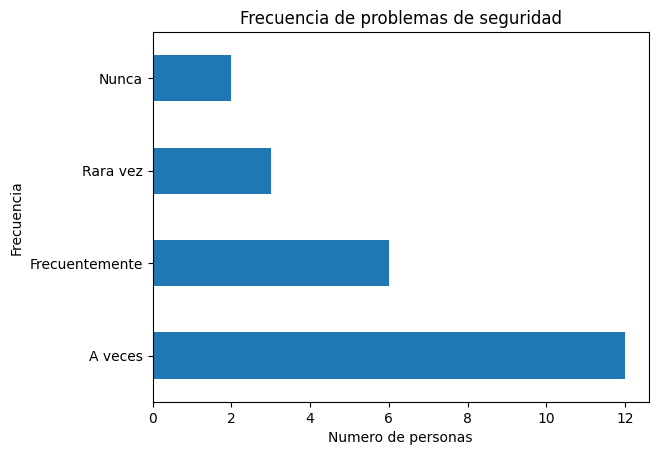

<Figure size 640x480 with 0 Axes>

In [611]:
security_problems_plot = results["frequency_security_problems"].value_counts()
security_problems_plot = security_problems_plot.rename(index=frequency_labels)
security_problems_plot = security_problems_plot.plot(kind="barh")
security_problems_plot.set_title("Frecuencia de problemas de seguridad")
security_problems_plot.set_xlabel("Numero de personas")
security_problems_plot.set_ylabel("Frecuencia")
create_plot("frecuencia_problemas_seguridad")

## ¿Con qué frecuencia enfrenta problemas relacionados con la basura o residuos?

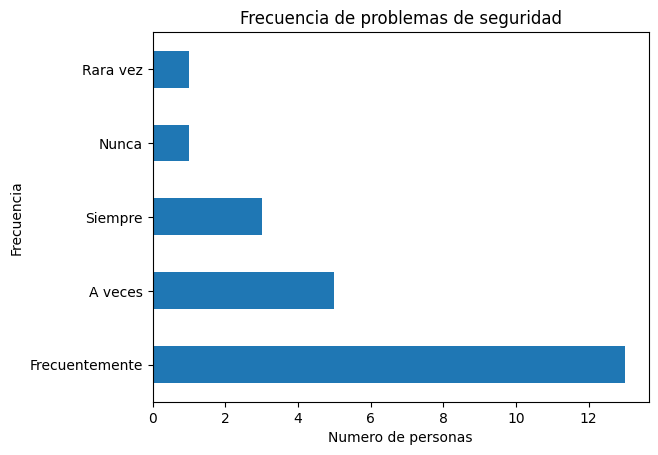

<Figure size 640x480 with 0 Axes>

In [612]:
waste_problems_plot = results["frequency_waste_problems"].value_counts()
waste_problems_plot = waste_problems_plot.rename(index=frequency_labels)
waste_problems_plot = waste_problems_plot.plot(kind="barh")
waste_problems_plot.set_title("Frecuencia de problemas de seguridad")
waste_problems_plot.set_xlabel("Numero de personas")
waste_problems_plot.set_ylabel("Frecuencia")
create_plot("frecuencia_desechos_problemas")

## Save Serialized Data

In [613]:
results["date"].apply(datetime.date)


spanish_results = results.rename(columns={
    "date": "fecha",
    "age": "edad",
    "gender": "genero",
    "has_access_smartphone": "tiene_acceso_smartphone",
    "would_use_app": "usaria_app",
    "uses_social_mobile_apps": "usa_apps_sociales",
    "years_lived_in_dimitrov": "anios_en_dimitrov",
    "frequency_security_problems_dimitrov": "frecuencia_problemas_seguridad",
    "frequency_waste_problems_dimitrov": "frecuencia_problemas_basura",
    "security_problems": "tipos_problemas_seguridad",
    "waste_problems": "tipos_problemas_basura",
    "knows_where_report": "sabe_donde_reportar",
    "are_authorities_efective": "autoridades_efectivas",
    "would_like_features": "funciones_deseadas_app",
    "age_range": "rango_edad"
})

id_mapper = {
    "value": "valor"
}

def save_dataframe_csv(df: pd.DataFrame, file_name: str):
    df.to_csv("output/"+ file_name +".csv", index=False)



save_dataframe_csv(would_like_features, "would_like_features")
save_dataframe_csv(are_authorities_efective, "are_authorities_efective")
save_dataframe_csv(frequency, "frequency")
save_dataframe_csv(results, "results")
save_dataframe_csv(waste_problems, "waste_problems")
save_dataframe_csv(security_problems, "security_problems")



with pd.ExcelWriter("output/datos_serializados.xlsx") as writer:
    spanish_results.to_excel(writer, sheet_name="datos", index=False)
    would_like_features.to_excel(writer, sheet_name="caracteristicas_sugeridas", index=False)
    are_authorities_efective.to_excel(writer, sheet_name="autoridades_efectivas", index=False)
    ambiguous_question.to_excel(writer, sheet_name="pegunta_ambigua", index=False)
    frequency.to_excel(writer, sheet_name="frecuencia", index=False)
    waste_problems.to_excel(writer, sheet_name="problemas_desechos", index=False)
    security_problems.to_excel(writer, sheet_name="problemas_seguridad", index=False)


